In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read DataSet and Some Visualization

<Axes: xlabel='Gender', ylabel='Count'>

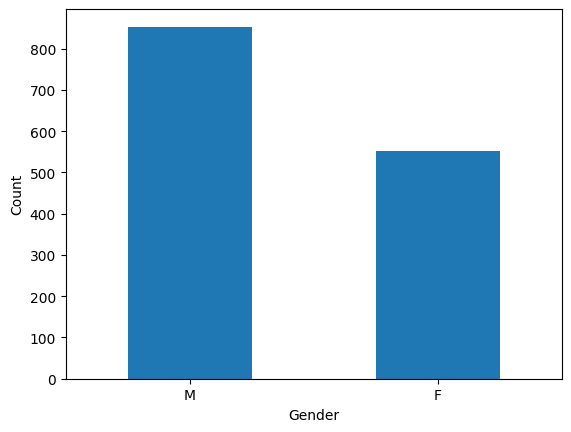

In [2]:
names = pd.read_csv("Dataset/Arabic_names.csv")
plt.xlabel("Gender")
plt.ylabel("Count")
names.Gender.value_counts().plot.bar(rot=0)

array([<Axes: title={'center': 'F'}, ylabel='Frequency'>,
       <Axes: title={'center': 'M'}, ylabel='Frequency'>], dtype=object)

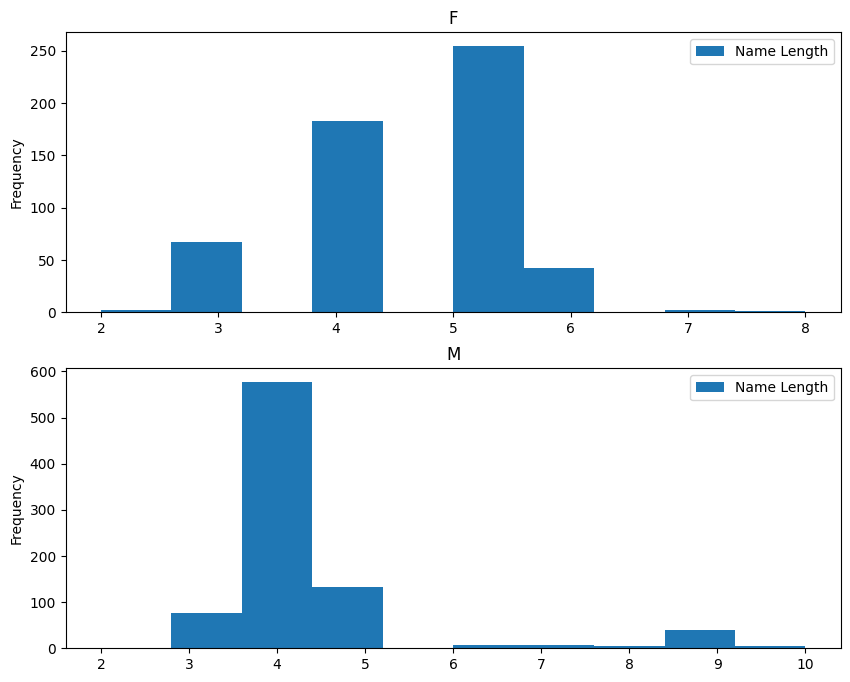

In [3]:
names["Name Length"]= names["Name"].str.len()
names.plot.hist(column=["Name Length"], by="Gender", figsize=(10, 8))

## Add names from txt file to the dataframe

In [16]:
names = pd.read_csv("Dataset/Arabic_names.csv")


In [17]:
def Get_UnseenNames(filename, Gender, df):
    with open(filename) as f:
        lines = f.readlines()
        New_MNames=[[line.strip(), Gender] for line in lines if not line.strip() in df.Name.values ]
        return  pd.DataFrame(New_MNames, columns=["Name", "Gender"])

In [18]:
new_Mnames = Get_UnseenNames("Dataset/mnames.txt", "M", names)
new_Fnames = Get_UnseenNames("Dataset/fnames.txt", "F", names)

print(f"len of the new male names {len(new_Mnames)}")
print(f"len of the new Female names {len(new_Fnames)}")
print(f"len of the dataframe before append {len(names)}")


names = pd.concat([names, new_Mnames, new_Fnames], axis=0)
print(f"len of the dataframe after append {len(names)}")

len of the new male names 93
len of the new Female names 72
len of the dataframe before append 1405
len of the dataframe after append 1570


In [19]:
names.to_csv("New_Names.csv", index=False)